# <span style="color: #0000FF">Détection automatique du port de masque</span>

## 1. Importer les données

Voiçi la structure de notre base de données.

<img src="https://lh3.googleusercontent.com/nv0tQRiasJ5NIrYGVk0byFtxf9mGHvnsGCy-NJNFt40-2AvVN7AewLPLAvZRZAu0QU9ph7aJ9qaLFQHbTu7Fjpk1RGh0u3H9ZWOv32fomd2zU9P8TSUMkIQeXHvzi9BqfWAFWoUBLxfSeUyaT-K7JByndpPp-_Mt7-q5f9jqL_pFjLrDJJosQjd-kWQv5RjguPQdaJG_wYDueyIAVeRq88HewJijjMnl_tDByIOtOghQACPAxMWZk29m4sSDMxX8cPyEQ4F-uOZpRCqXONBwkVZ7qnxpijOB1h9k2QyJMLdW8mNw_BzYgvaKSmaPscNO-LX50lb7fLN9Hd1uer646NZtYNs4NKR6yx54MUSA3HpOxP9eTgkYYfpRRs1wczqzNSgMoT1XLNBNuyHdtq8nd7GdZLxEcaKES7TupAj6bTAI4hHkpXOFfZ9GsuRDAFIJ4BoDYomKCUpP88GEVbRBHjA2NhkyWOMOTyawVALehWt87IW27TbTimLDl-MD21kDUk4oR7nBamj8k1YXvoAti-zZ0nX5Z5G8C8ZfuWxbFbg9gGeQTEAR3erEqHccObAyiOH06v_-F3A2PuAnfN8du6AJQgLUucmYQSNd8TmvQUQd_qnvPn4d0lPHZf8_8b63UAWJhCVEr7XyK4o1tnJXCKrov9uqp7en5xZQUIzggesi6F7HRaHLdfzOAMMvT35buXJvXdDE7cUQPVkHYM-nDqIa=w1347-h212-no?authuser=0"/>

1. Importer les bibliothèques nécessaires

In [1]:
import os # fournit des fonctions d'interaction avec le système d'exploitation
import cv2 # bibliothèque graphique libre spécialisée dans le traitement d'images
import numpy as np # manipuler des matrices ou tableaux multidimensionnels


2. Préparer les données

In [2]:
directory="data" # Le chemin du dataset

label2category = {'without': 0, 'with': 1, 'incorrect': 2} # sert pour le passage du label vers la catégorie
category2label = {0: 'without', 1: 'with', 2: 'incorrect'} # sert pour le passage de la catégorie vers le label

training_data=[] # liste pour les données d'apprentissage sous la forme [[image1, label1], [image2,label2],...]

Maintenant, on définit une fonction  <span style="font-family: Courier New">  create_train_data </span>qui fait le parcours de  la base de données et attribut à chaque image son label. Le but donc est de préparer la liste <span style="font-family: Courier New"> training_data. </span>
<p> OpenCV lit l'image avec la fonction <span style="font-family: Courier New">  cv2.imread </span>sous forme BGR, on la corrige donc en format RGB avec la fonction <span style="font-family: Courier New">  cv2.cvtColor </span> puis on la redimensionne avec <span style="font-family: Courier New">  cv2.resize</span> . Ci-dessous le résumé du pré-traitement à faire.</p>

<img src="https://lh3.googleusercontent.com/_X3g_-PdUBOLdvUpWiFFmzvK5yfWWbB22lAfN-Op6USnxgZ685u_cmzUCra0KGdVPWRkoFljJycxQ_E6zqhqP0KsmcZqwfHqsIN9r37KeTVDp8HAGYVpA4K9I9ehpblN4PhLl8ZvFdPtpV93Yqv_-9ej5JBzsrWLAU13mMD5Jdz_rHQo8sxbHrzKSK5eB6OrdhLARsy5Me5GHaLNIDDFczV80UPw2OPlqq3LhxDEpBrCAt-9gHbmfGPWe77PkO_IzrMOKV8wRUGFwkAANJVzoCzxoq7DqhaSnvsLHx60vOamuK3aYur3BkLIZbIftOSQ8tLeOZ6r0c9EPmJLxC7w7JvFrdUXg5XVrbmXt1-7-u3Ss0ymTC_Y4lPr-YIrhoz_p4n17ghdBH562wXpe0-GVwcc-g0zG0FZcb9b0dmonse3WWqQ0lojSwoReXmDGqg212bf92MGii8kUl2HrLjCgtk52vHElJ1wSdWlAM7yjV8RWoZTPN-MyntblUnQoY8alvX7vFbLEO_YRA0SEMs4pZg1xXGAQC1lwUdw49U1gFPq0aSWtyOMxR9a7QZnS3FdkOEwhuq3fS5qPSszdQipIALIIsFzetHSny4YCXluS78LaYFRqPBnaEaGYgswXRuhGvhNR1oj82Mjh-KSi91kr5a8I6V418kqxwJGCMXkYsbVBzJXgWlOAH8sG7qrlkqHJ8ZzPUfloHG7CIUPrF3mKyby=w1363-h421-no?authuser=0"/>

In [3]:
from tensorflow.keras.utils import to_categorical

img_size=100 # variable pour définir la taille des images

def create_train_data():
    
    for category in label2category.keys():
        path = os.path.join(directory,category) 
        class_num = label2category[category]#inconv
        target = to_categorical(class_num, num_classes=len(category2label)) # oneHot encoding
        
        for img in os.listdir(path):# pour chaque image
            try:
                img_array = cv2.imread(os.path.join(path,img)) # lire l'image
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) # convertir en format RGB
                new_array= cv2.resize(img_array,(img_size,img_size)) # dimensionner les images 100×100
                training_data.append([new_array,target]) # ajouter l'image et son label à training_data
            except Exception as e:
                pass

Pouquoi la fonction <span style="font-family: Courier New ">to_categorial </span> ?


Nous disposons de <strong> données catégorielles</strong>. (catégorie 1 : masque non porté, catégorie 2 : masque porté, catégorie 3 : masque mal porté). <p> Or, les algorithmes d'apprentissage automatique ne peuvent pas fonctionner directement avec des données catégorielles. Celles-ci doivent être converties <b>en nombres</b>.<p/>
<p> Intuitivement, on peut donner à chaque catégorie un identifiant: Par exemple, 0 pour le masque porté, 1 pour le masque non porté et 2 pour le masque mal porté </p> <p>
Dans ce cas,  il y a une très forte probabilité que le modèle capture la relation entre les trois classes tels que le masque porté < le masque non porté < le masque mal porté. Or, dans notre cas,  il n'y a pas d'ordre ou de rang entre les trois classes. <p> Pour remédier à ça, on recourt à la technique <span style="color: #FF0000">One Hot Encoding </span> pour représenter les variables catégorielles sous forme de vecteurs binaires: chaque valeur entière est représentée comme un vecteur binaire qui contient des zéros à l'exception de l'indice de l'entier, qui est marqué d'un 1. </p>
<p> En conclusion, la classe du masque non porté est encodée par [1 0 0], porté par [0 1 0] et mal porté par [0 0 1] </p>

In [4]:
create_train_data() # créer les données

On mélange aléatoirement les données avec la fonction <span style="font-family: Courier New "> shuffle </span>
: Le mélange uniforme garantit que chaque élément a la même chance de se produire à n'importe quelle position.

In [5]:
import random
random.shuffle(training_data)

In [6]:
X = [] # features
y = [] # labels

for features,label in training_data:
    X.append(features)
    y.append(label)

Jetons un coup d'oeil sur la quantité des données

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


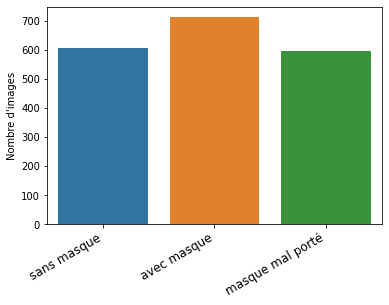

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(np.argmax(y, axis=1))

ax.set_xticklabels(['sans masque', 'avec masque', 'masque mal porté'], rotation=30, ha="right", fontsize=12)
plt.ylabel("Nombre d'images")
plt.show()

## 2.Transfer Learning

L'apprentissage par transfert est la réutilisation d'un <strong>modèle pré-formé</strong> sur un nouveau problème: Cette technique permet de transférer la connaissance acquise sur un jeu de données source pour mieux traiter un nouveau jeu de données cible.
<p> On utilise le Transfer Learning quand <strong>on ne dispose pas de suffisemment de données</strong>. De plus, <strong>le temps de formation est réduit</strong> car il peut parfois prendre des jours, voire des semaines, pour entraîner un réseau de neurones profond à partir de zéro sur une tâche complexe. </p>
<p> Pour ce faire, on va utiliser le modèle InceptionV3 de Google.</p>

In [8]:
from tensorflow.keras.applications.inception_v3 import InceptionV3 # importer InceptionV3

pre_trained_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(100, 100, 3))


On va prendre le modèle InceptionV3 : On va conserver la grande partie du modèle et une partie B on va l'entrainer sur nos données.

<img src="https://quantum-journal.org/wp-content/uploads/2020/10/1912.08278v2.png" width="500" height="600"/>

* Préparer le modèle

In [9]:
import tensorflow as tf

# conserver une partie du modèle
for layer in pre_trained_model.layers:
    layer.trainable = False
    
last_layer = pre_trained_model.get_layer('mixed7') # depuis cette couche, on va ajouter de nouvelles couches

x = tf.keras.layers.Flatten()(last_layer.output)

x = tf.keras.layers.Dense(1024, activation='relu')(x)

x = tf.keras.layers.Dropout(0.3)(x)


x = tf.keras.layers.Dense(3, activation='softmax')(x) # Pour chaque image on a 3 sorties

model = tf.keras.models.Model(inputs=pre_trained_model.input, outputs=x)

model.summary(); # un résumé des couches

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 49, 49, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 49, 49, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) # choisir les paramètres d'évaluation

* Adapter les données au modèle

In [11]:
X=np.array(X).reshape(-1,img_size,img_size,3) 
X=X/255. # normalisation des données
Y=np.array(y)

* Enfin ! Entrainer le modèle

In [12]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)


In [13]:
from tensorflow.keras.callbacks import EarlyStopping

call=[EarlyStopping(monitor='val_acc',mode='max')]
history = model.fit(X_train, 
                    Y_train, 
                    epochs=20,
                    callbacks=call,
                    validation_split=0.1)

Epoch 1/20
49/49 [==============================] - 20s 312ms/step - loss: 2.0907 - acc: 0.7589 - val_loss: 0.2303 - val_acc: 0.9244
Epoch 2/20
49/49 [==============================] - 12s 254ms/step - loss: 0.1167 - acc: 0.9485 - val_loss: 0.0844 - val_acc: 0.9767
Epoch 3/20
49/49 [==============================] - 12s 252ms/step - loss: 0.0306 - acc: 0.9885 - val_loss: 0.0543 - val_acc: 0.9826
Epoch 4/20
49/49 [==============================] - 12s 252ms/step - loss: 0.0181 - acc: 0.9935 - val_loss: 0.0747 - val_acc: 0.9767


Présentons le loss et l'accuracy en fonction du batches

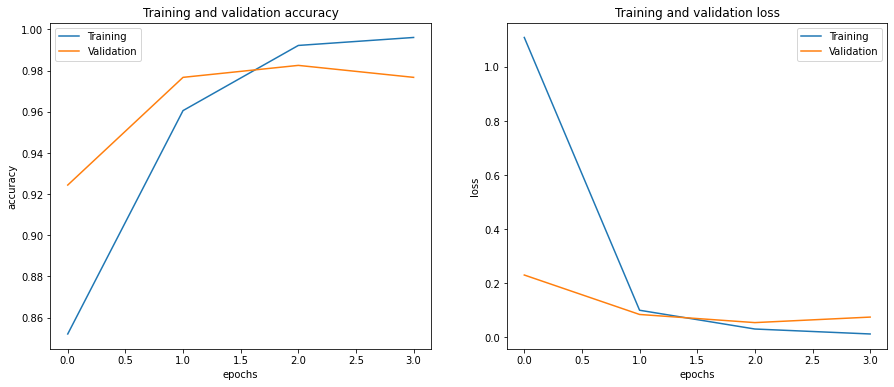

In [14]:
# Evolution des fonctions LOSS et ACCURACY
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(122)
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<strong>Matrice de confusion</strong>

In [15]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 2s 204ms/step - loss: 0.2129 - acc: 0.9427


[0.21288393437862396, 0.9427083134651184]

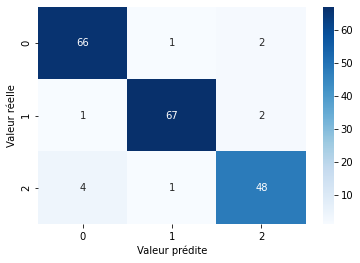

In [16]:
from sklearn.metrics import confusion_matrix
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_test = np.argmax(Y_test, axis=1)
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='g', cmap=plt.cm.Blues)
plt.xlabel('Valeur prédite')
plt.ylabel('Valeur réelle')
plt.show()

## 3. Détection en temps réel

Il serait plus judicieux de faire entrer au modèle juste la partie du visage et non pas toute le champs détecté par la caméra.

<img src="https://lh3.googleusercontent.com/a9t_yethetFeVUaDaeNdcRmHC7sWVhRmQ6g0AftvFng53qdGHbYANBNr9pCS9qT4Q0J_0GsoJpsYmQpglRR6jUnWdgURm9JcqkOQrhYi0kHKnXw-944lnSWaEuYb5H1ft8iqTEOOTIIeJnBAD_BKuoSLmHKG0R5giHt1XFcNE6p_FA7yY_kltnz8yXCKgt07KXRRAfaLhumZ3xP6ZxV1hbuABGeVdMFU9N8d5cumoCQ-YRZREGSMYxorp8uGH16j0kz2ZTTpAUgBoEkNcWE2rXa4EQXrWErKFNcFqCfNcniu0y0FeVmk0TQXcbzGNVcavc1-pND_PZHO3JnDiuJrqKtkW__xtagvgPCJ2ldTizvtMUEWbl5YI3CUSdMtvtfnhXTb7MkqtGHk7RJVgg9l7IlMQDsTkJdIv3gYuKZ3r0APdD6SN1-RuWay4nVYSkg-U5B1FvZHGMjPpqhhogKbYQ_CsQo4J9TntGXN8G4vPnFhzI9mY8Z1xB71uPgPlG2b1HwhQ6MOZkrxCjAqd871u5f2koaGBcEfRFgKzF-COKf_G-8wooZrEVcblMdEKoahkT4dKfyk9__8ctnqL7TZkVU6r2GQyiuucU0YaOWTM8oasQZEexV_rHBHI89l6kb7oflD0fmxCki-LQBJKcJXHnU8Ndg4taE9BMBKV4lu4W8V1vYDdl3hTbKMKmsiBcWg8QgjoyiejGw1--KfEbzi7utx=w1732-h896-no?authuser=0" width="800" height="1200"/>

In [28]:
colors = {0: (0, 0, 255), 1: (0, 255, 0), 2: (0, 255, 255)} # les codes couleurs

# Le classifieur du détection du visage
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Vidéo du webcam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    print('ERROR')
    
    
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
        
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) # convertir la frame en nuage_de_gris
    
    faces = face_cascade.detectMultiScale(gray, 1.2, 4) # détecter les visages dans la frame
    
    for (x, y, w, h) in faces:
        roi =  frame[y: y+h+100, x-70 : x+w+100]
        data = cv2.resize(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB), (img_size,img_size))
        data = data / 255.
        data = data.reshape((1,) + data.shape)
        scores = model.predict(data)
        print(scores)
        target = np.argmax(scores, axis=1)[0]
                 # Dessiner les boxes
        cv2.rectangle(img=frame, pt1=(x-70, y), pt2=(x+w+100, y+h+100), color=colors[target], thickness=2)
        text = "{}: {:.2f}".format(category2label[target]+" mask", scores[0][target])
        cv2.putText(frame, text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)

    # Afficher le résultat
    cv2.imshow('Face Mask Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'): # entrer la touche q pour quitter
        break

cap.release()
cv2.destroyAllWindows()

[[9.8727357e-01 1.8012108e-05 1.2708424e-02]]


<strong>Enregister le modèle</strong>

In [18]:
model.save('mymodel020620212018.h5')

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 49, 49, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 49, 49, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [20]:
import tensorflow
tensorflow.__version__

'2.4.1'